In [ ]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 135 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638563 sha256=a290a946c4d74b76484a66cbf0ad63b07677503066d4c34c40e77ecee27148cb
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 16.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas_datareader as pdr

In [ ]:
stock = input("Enter the nasadq index: \n")
df = pdr.get_data_yahoo(stock)
#df = pdr.get_data_yahoo('TSLA')

Enter the nasadq index: 
TSLA


In [ ]:
df=df.reset_index()
df.rename(columns={'Date': 'ds', 'High': 'y'}, inplace=True)

In [ ]:
df

,ds,y,Low,Open,Close,Volume,Adj Close
0,2017-11-20,21.033333,20.316668,20.919333,20.582666,123715500.0,20.582666
1,2017-11-21,21.215334,20.580667,20.724001,21.187332,108919500.0,21.187332
2,2017-11-22,21.161333,20.789333,21.118000,20.840000,73764000.0,20.840000
3,2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
4,2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
...,...,...,...,...,...,...,...
1253,2022-11-11,196.520004,182.589996,186.000000,195.970001,114229200.0,195.970001
1254,2022-11-14,195.729996,186.339996,192.770004,190.949997,92226600.0,190.949997
1255,2022-11-15,200.820007,192.059998,195.880005,194.419998,91293800.0,194.419998
1256,2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998


In [ ]:
df.isna().sum()

ds           0
y            0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df.describe()

,y,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,131.719074,125.489977,128.750892,128.664471,1.315088e+08,128.664471
std,121.728710,115.950452,119.028377,118.844109,9.027802e+07,118.844109
min,12.445333,11.799333,12.073333,11.931333,2.940180e+07,11.931333
25%,21.220167,20.550667,20.890000,20.904333,7.467420e+07,20.904333
50%,57.777332,55.151999,56.806334,56.446667,1.011248e+08,56.446667
75%,239.940838,231.327496,235.611671,236.144165,1.519890e+08,236.144165
max,414.496674,405.666656,411.470001,409.970001,9.140820e+08,409.970001


In [ ]:
df.describe

<bound method NDFrame.describe of              ds           y         Low        Open       Close       Volume  \
0    2017-11-20   21.033333   20.316668   20.919333   20.582666  123715500.0   
1    2017-11-21   21.215334   20.580667   20.724001   21.187332  108919500.0   
2    2017-11-22   21.161333   20.789333   21.118000   20.840000   73764000.0   
3    2017-11-24   21.094000   20.733334   20.919333   21.036667   48661500.0   
4    2017-11-27   21.156000   20.634001   20.883333   21.120667   68338500.0   
...         ...         ...         ...         ...         ...          ...   
1253 2022-11-11  196.520004  182.589996  186.000000  195.970001  114229200.0   
1254 2022-11-14  195.729996  186.339996  192.770004  190.949997   92226600.0   
1255 2022-11-15  200.820007  192.059998  195.880005  194.419998   91293800.0   
1256 2022-11-16  192.570007  185.660004  191.509995  186.919998   66567600.0   
1257 2022-11-17  186.160004  180.899994  183.960007  183.169998   64187200.0   

     

In [ ]:
df.shape

(1258, 7)

In [ ]:
df=df.dropna()

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[ 21.03333282],
       [ 21.21533394],
       [ 21.16133308],
       ...,
       [200.82000732],
       [192.57000732],
       [186.16000366]])

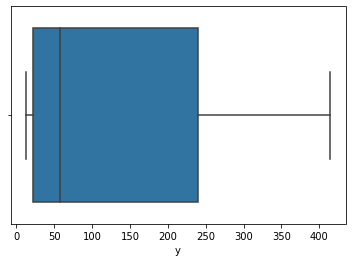

In [ ]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [ ]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=30)

In [ ]:
future_dates.tail()

,ds
1283,2022-12-13
1284,2022-12-14
1285,2022-12-15
1286,2022-12-16
1287,2022-12-17


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-20,11.772975,-13.467633,39.182744,11.772975,11.772975,1.136832,1.136832,1.136832,-1.434006,-1.434006,-1.434006,2.570838,2.570838,2.570838,0.0,0.0,0.0,12.909807
1,2017-11-21,11.838376,-11.743078,36.952531,11.838376,11.838376,2.104415,2.104415,2.104415,-1.452690,-1.452690,-1.452690,3.557106,3.557106,3.557106,0.0,0.0,0.0,13.942791
2,2017-11-22,11.903777,-11.092714,39.249291,11.903777,11.903777,2.978915,2.978915,2.978915,-1.598478,-1.598478,-1.598478,4.577393,4.577393,4.577393,0.0,0.0,0.0,14.882692
3,2017-11-24,12.034580,-11.479917,40.216814,12.034580,12.034580,4.025778,4.025778,4.025778,-2.618005,-2.618005,-2.618005,6.643783,6.643783,6.643783,0.0,0.0,0.0,16.060358
4,2017-11-27,12.230783,-6.435030,45.811444,12.230783,12.230783,8.075972,8.075972,8.075972,-1.434006,-1.434006,-1.434006,9.509978,9.509978,9.509978,0.0,0.0,0.0,20.306756


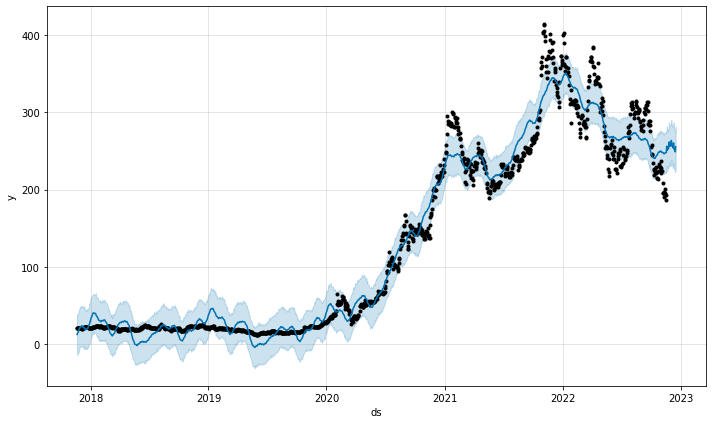

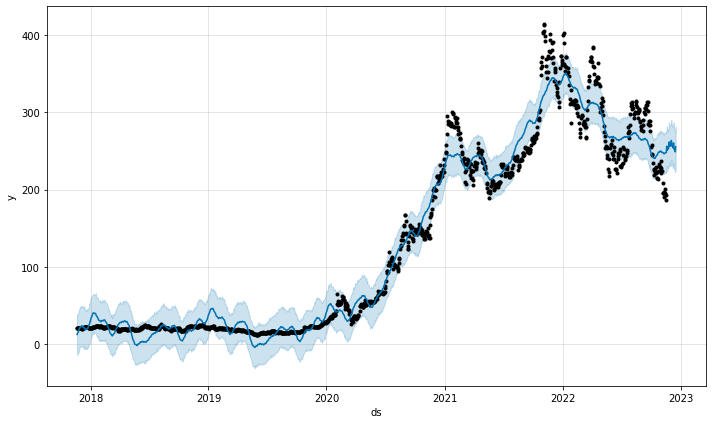

In [ ]:
model.plot(prediction)

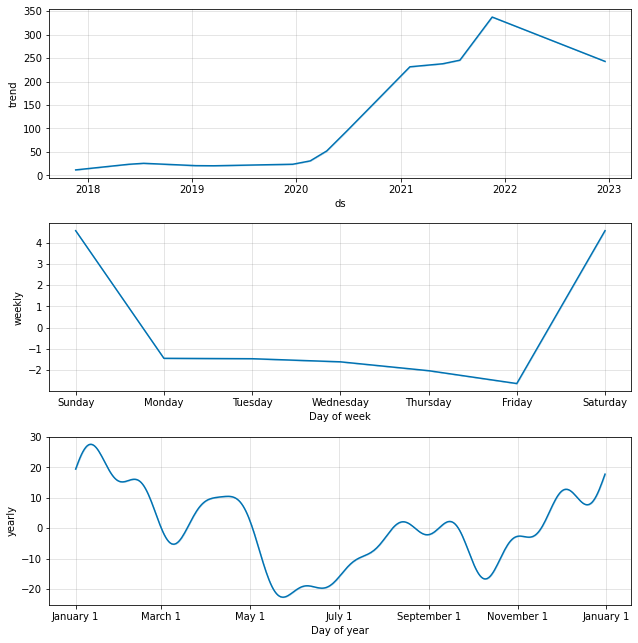

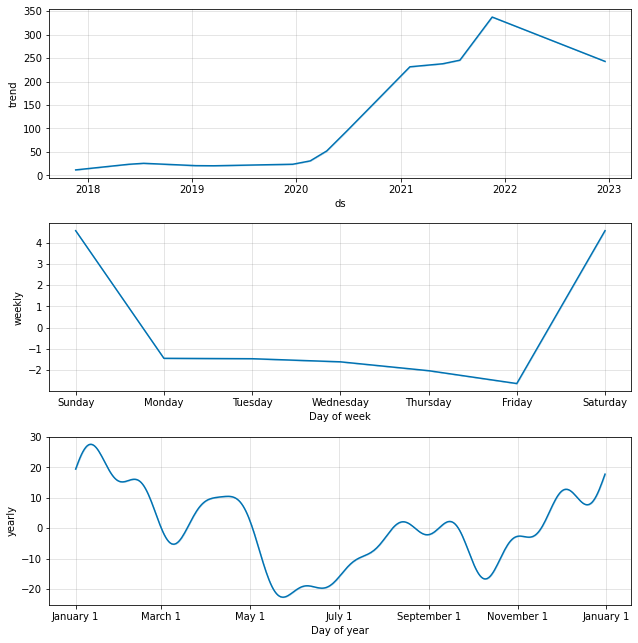

In [ ]:
model.plot_components(prediction)

In [ ]:
df.head()

,ds,y,Low,Open,Close,Volume,Adj Close
0,2017-11-20,21.033333,20.316668,20.919333,20.582666,123715500.0,20.582666
1,2017-11-21,21.215334,20.580667,20.724001,21.187332,108919500.0,21.187332
2,2017-11-22,21.161333,20.789333,21.118000,20.840000,73764000.0,20.840000
3,2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
4,2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-11-28 00:00:00 and 2021-11-17 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-29,23.170496,21.900669,24.518231,22.084000,2019-11-28
1,2019-12-02,23.585518,22.311171,24.891703,22.425333,2019-11-28
2,2019-12-03,23.748537,22.411511,24.919186,22.527332,2019-11-28
3,2019-12-04,23.875200,22.586957,25.207291,22.524000,2019-11-28
4,2019-12-05,24.026769,22.740855,25.262672,22.294666,2019-11-28


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1447.485796,38.045838,28.406978,0.148083,0.149787,0.178571
1,39 days,1467.074433,38.302408,28.840468,0.151502,0.153612,0.166667
2,40 days,1460.284851,38.213674,28.925482,0.153604,0.154640,0.158730
3,41 days,1472.681012,38.375526,29.212682,0.156781,0.157415,0.146825
4,42 days,1434.363651,37.872994,29.021055,0.158965,0.157515,0.136905


In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1447.485796,38.045838,28.406978,0.148083,0.149787,0.178571
1,39 days,1467.074433,38.302408,28.840468,0.151502,0.153612,0.166667
2,40 days,1460.284851,38.213674,28.925482,0.153604,0.154640,0.158730
3,41 days,1472.681012,38.375526,29.212682,0.156781,0.157415,0.146825
4,42 days,1434.363651,37.872994,29.021055,0.158965,0.157515,0.136905


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


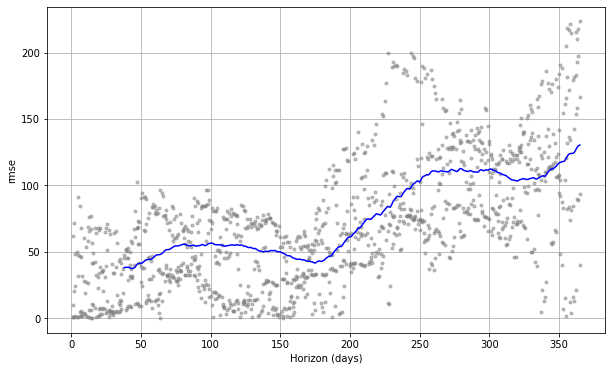

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
df

,ds,y,Low,Open,Close,Volume,Adj Close
0,2017-11-20,21.033333,20.316668,20.919333,20.582666,123715500.0,20.582666
1,2017-11-21,21.215334,20.580667,20.724001,21.187332,108919500.0,21.187332
2,2017-11-22,21.161333,20.789333,21.118000,20.840000,73764000.0,20.840000
3,2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
4,2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
...,...,...,...,...,...,...,...
1253,2022-11-11,196.520004,182.589996,186.000000,195.970001,114229200.0,195.970001
1254,2022-11-14,195.729996,186.339996,192.770004,190.949997,92226600.0,190.949997
1255,2022-11-15,200.820007,192.059998,195.880005,194.419998,91293800.0,194.419998
1256,2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998


In [ ]:
prediction.tail(365)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
923,2021-07-23,244.984856,209.641422,259.952324,244.984856,244.984856,-10.549149,-10.549149,-10.549149,-2.618005,-2.618005,-2.618005,-7.931144,-7.931144,-7.931144,0.0,0.0,0.0,234.435707
924,2021-07-26,245.365988,211.958130,263.232533,245.365988,245.365988,-8.292720,-8.292720,-8.292720,-1.434006,-1.434006,-1.434006,-6.858714,-6.858714,-6.858714,0.0,0.0,0.0,237.073268
925,2021-07-27,245.493031,211.478486,260.841936,245.493031,245.493031,-7.866859,-7.866859,-7.866859,-1.452690,-1.452690,-1.452690,-6.414169,-6.414169,-6.414169,0.0,0.0,0.0,237.626172
926,2021-07-28,246.306104,214.441399,263.519659,246.306104,246.306104,-7.524123,-7.524123,-7.524123,-1.598478,-1.598478,-1.598478,-5.925645,-5.925645,-5.925645,0.0,0.0,0.0,238.781981
927,2021-07-29,247.119176,214.036492,264.754751,247.119176,247.119176,-7.410167,-7.410167,-7.410167,-2.014632,-2.014632,-2.014632,-5.395535,-5.395535,-5.395535,0.0,0.0,0.0,239.709009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2022-12-13,243.884861,226.249749,278.051973,243.486224,244.414357,8.223434,8.223434,8.223434,-1.452690,-1.452690,-1.452690,9.676124,9.676124,9.676124,0.0,0.0,0.0,252.108294
1284,2022-12-14,243.645768,225.951807,276.693074,243.187358,244.279536,7.565134,7.565134,7.565134,-1.598478,-1.598478,-1.598478,9.163612,9.163612,9.163612,0.0,0.0,0.0,251.210902
1285,2022-12-15,243.406675,222.777762,274.933349,242.881707,244.116048,6.685167,6.685167,6.685167,-2.014632,-2.014632,-2.014632,8.699799,8.699799,8.699799,0.0,0.0,0.0,250.091842
1286,2022-12-16,243.167581,223.318482,273.627411,242.584071,243.917853,5.688806,5.688806,5.688806,-2.618005,-2.618005,-2.618005,8.306811,8.306811,8.306811,0.0,0.0,0.0,248.856388


In [ ]:
df.tail()

,ds,y,Low,Open,Close,Volume,Adj Close
1253,2022-11-11,196.520004,182.589996,186.000000,195.970001,114229200.0,195.970001
1254,2022-11-14,195.729996,186.339996,192.770004,190.949997,92226600.0,190.949997
1255,2022-11-15,200.820007,192.059998,195.880005,194.419998,91293800.0,194.419998
1256,2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998
1257,2022-11-17,186.160004,180.899994,183.960007,183.169998,64187200.0,183.169998


In [ ]:
import pickle

In [ ]:
pickle_out = open("classifier.pkl",mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
!pip install streamlit -q

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py

import pickle
import streamlit as st
st.write('Hello world from Team Timester, This is our ML project - `TIMESTER`')
#st.write('## Predciting with `TIMESTER`')
st.write('## Time Series Analysis !! No problem `TIMESTER` is with you ')
st.write('our website `https://timester-29.herokuapp.com/`')

#loading the trained model
pickle_in = open('classifier.pkl','rb')
classifier = pickle.load(pickle_in)

@st.cache


def fb1_prediction(user_inp):
      future_dates=classifier.make_future_dataframe(periods=user_inp)
      predict1 = classifier.predict(future_dates)
      print(predict1)
      classifier.plot_components(predict1)
      return predict1

def plot_components(user_inp):
      future_dates=classifier.make_future_dataframe(periods=user_inp)
      predict1=classifier.predict(future_dates)
      predict2=st.area_chart(predict1.trend)
      predict2=st.line_chart(predict1.trend)
      return predict2

def main():
      #giving a title for our website
      st.title('TIMESTER - Predciting Future Is No More Magic')
      #GET INPUT FROM THE USER
      user_inp = st.text_input("Number of days","type here")
      #code for prediction
      result = ""
      result2 = ""

      #creating button for prediction

      if st.button("Future Stock Price"):
          result=fb1_prediction(int(user_inp))
          #future_dates=classifier.make_future_dataframe(periods=365)
          #predict1=classifier.predict(future_dates)
          #classifier.plot(predict1)
          #diagnosis=fb1_prediction(user_inp)

      st.success('The output is {}'.format(result))

      if st.button("Plot For Different Stocks Price"):
          result2=plot_components(int(user_inp))

      st.success('The graph is {}'.format(result2))

if __name__ == '__main__':
    main()
    


Overwriting app.py


In [ ]:
from pyngrok import ngrok

In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ngrok.set_auth_token("2HiLTI0fWi4t3R1bpxnKtDxTEzv_7Kfwx2PztWtdu3KYctGhb")

In [ ]:
!nohup streamlit ruk app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'


PyngrokNgrokHTTPError: ignored

In [ ]:
!streamlit run --server.port 80 app.py >/dev/null

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.7/dist-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.7/dist-packages/streamlit/delta_generator.py", line 45, in <module>
    from streamlit.elements.arrow_altair import ArrowAltairMixin
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/arrow_altair.py", line 42, in <module>
    from streamlit.elements.utils import last_index_for_melted_dataframes
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/utils.py", line 82, in <module>
    ) -> LabelVisibilityMessage.LabelVisibilityOptions.ValueType:
  File "/usr/local/lib/python3.7/dist-packages/google/protobuf/internal/enum_type_wrapper.py", line 115, in __getattr__
    self._enum_type.name, name))
AttributeError: Enum LabelVisibilityOptions